# Star Wars: The Data Awakens

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from their GitHub repository.

This project aims at cleaning and exploring the dataset and finding answers to some interesting questions!

In [21]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The 'RespondentID' column seems to contain NaN values that we should get rid off from our dataset. The RespondentID column should typically contain unique, non-null values. Let's clean our dataframe

In [22]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [8]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [14]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].describe()

count     1186
unique       2
top        Yes
freq       936
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object

Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
These columns contain strings for 'Yes' or 'No' in addition to NaN (when the responder did not specify an answer). Let's convert these to boolean (True/False) for easy manipulations later

In [23]:
yes_no_to_true_false = {
    "Yes": True,
    "No": False
}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no_to_true_false)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no_to_true_false)

1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [25]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [36]:
for i in range(3, 9):
    print(star_wars[star_wars.columns[i]].unique())

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


In [41]:
for i in range(3, 9):
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].notnull()

In [45]:
column_map = {}
for idx, column in enumerate(star_wars.columns[3:9]):
    column_map[column] = "seen_" + str(idx + 1)

In [46]:
column_map

{'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6',
 'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1'}

In [48]:
star_wars.rename(column_map, axis=1, inplace=True)

In [49]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [51]:
column_map = {}
for idx, column in enumerate(star_wars.columns[9:15]):
    column_map[column] = "ranking_" + str(idx + 1)

In [53]:
star_wars.rename(column_map, axis=1, inplace=True)

In [55]:
mean_rankings = star_wars[star_wars.columns[9:15]].mean()

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

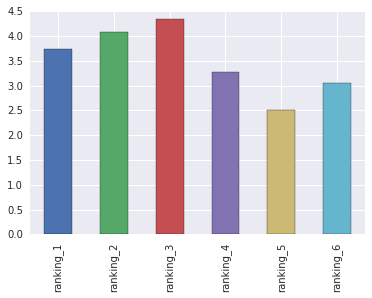

In [79]:
mean_rankings.plot.bar()

From the above bar chart, ranking_5 (Star Wars: Episode V The Empire Strikes Back) has the lowest ranking (Better movie) and ranking_3 (Star Wars: Episode III  Revenge of the Sith) has the highest ranking (Not so favourite)

In [59]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

In [63]:
seen_counts = star_wars[star_wars.columns[3:9]].sum()

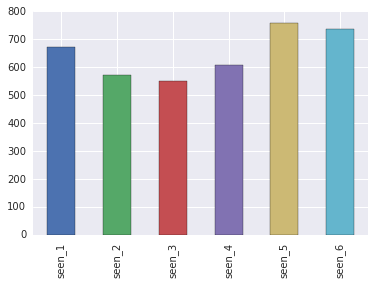

In [80]:
seen_counts.plot.bar()

Hmmm, looks like Star Wars: Episode V The Empire Strikes Back is not only the most liked episode but also has maximum views. This also holds true for Episode III, which has the least views and is least favourite! (The number of views and ranking seem to be correlated)

In [65]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [69]:
print(males.shape, females.shape)

(497, 38) (549, 38)


In [74]:
mean_rankings_males = males[males.columns[9:15]].mean()
mean_rankings_females = females[females.columns[9:15]].mean()

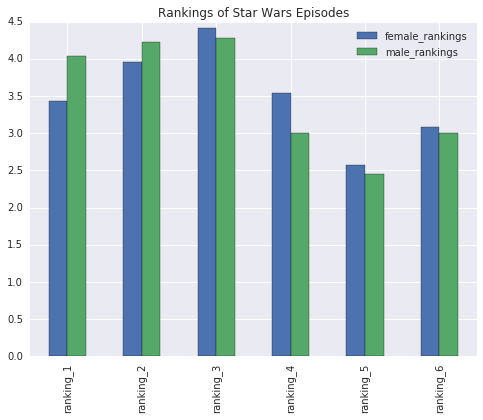

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
df = pd.DataFrame({'male_rankings': mean_rankings_males, 
                  'female_rankings': mean_rankings_females}, index=mean_rankings_males.index)
df.plot.bar(ax=ax)
ax.set_title("Rankings of Star Wars Episodes")
plt.show()

In [84]:
seen_counts_males = males[males.columns[3:9]].sum()
seen_counts_females = females[females.columns[3:9]].sum()

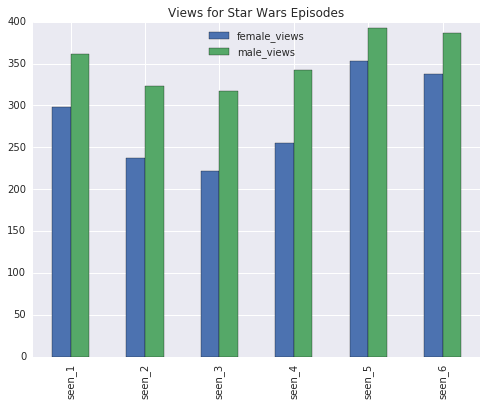

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
df = pd.DataFrame({'male_views': seen_counts_males, 
                  'female_views': seen_counts_females}, index=seen_counts_males.index)
df.plot.bar(ax=ax)
ax.set_title("Views for Star Wars Episodes")
plt.show()

Males tend to have, in general higher views for all the episodes than the females. Ratings show a similar trend in both the segments of the audience